In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)
    df = pd.read_json(json.dumps(register))
    df.head()

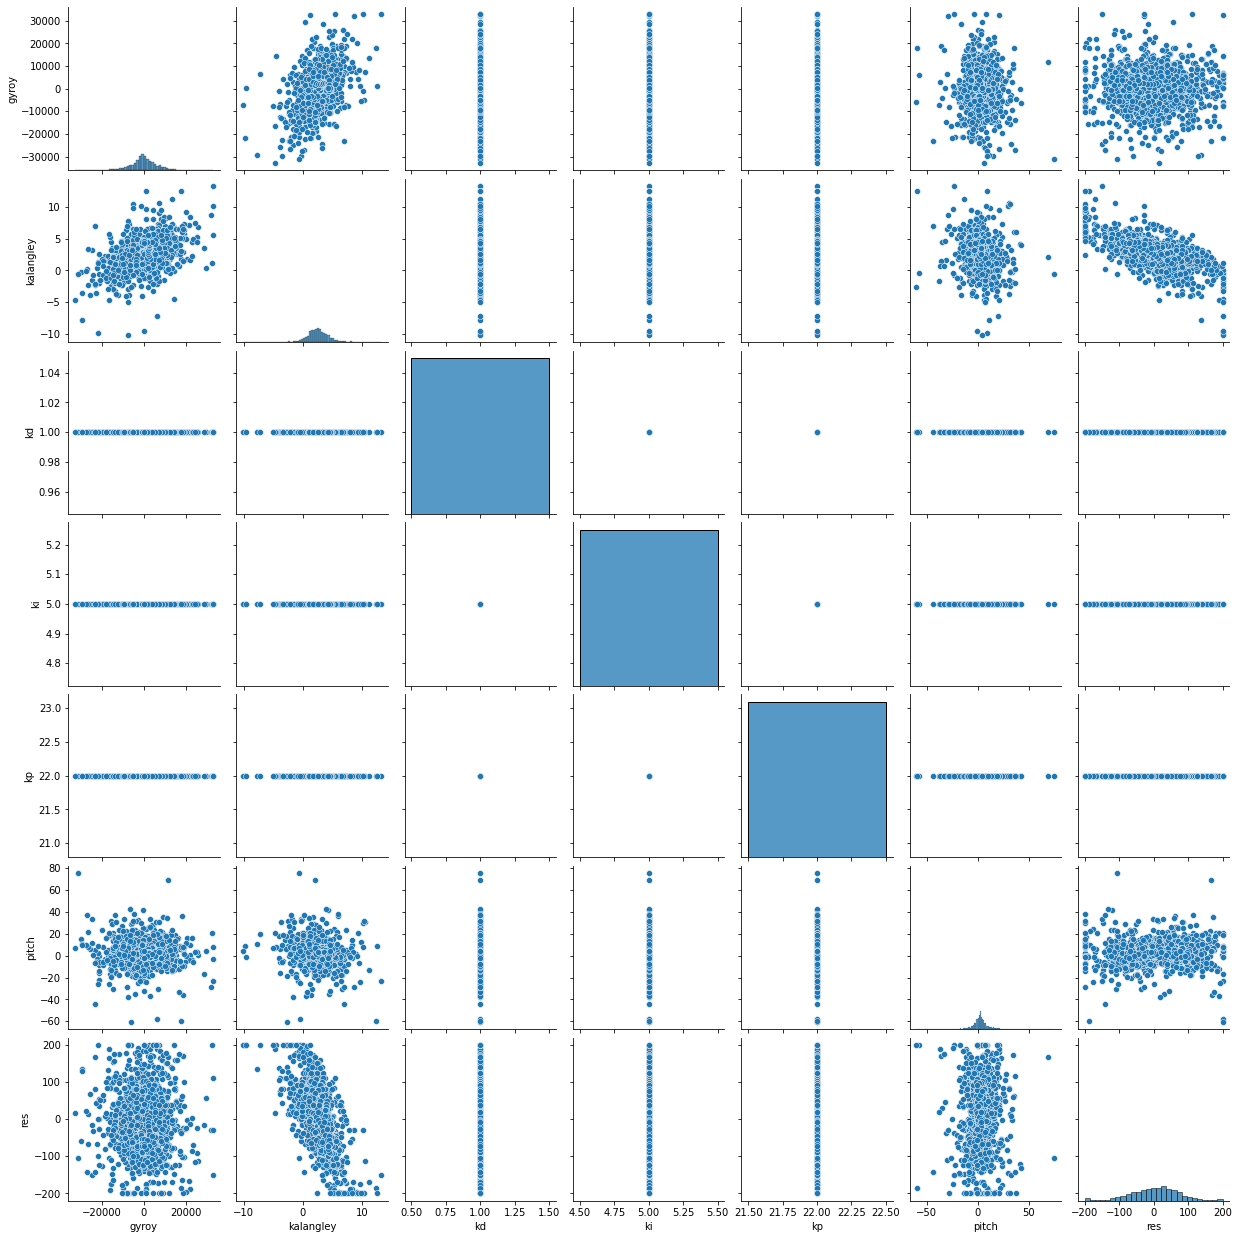

In [3]:
sns.pairplot(data = df)
plt.show()

/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='res', ylabel='Density'>

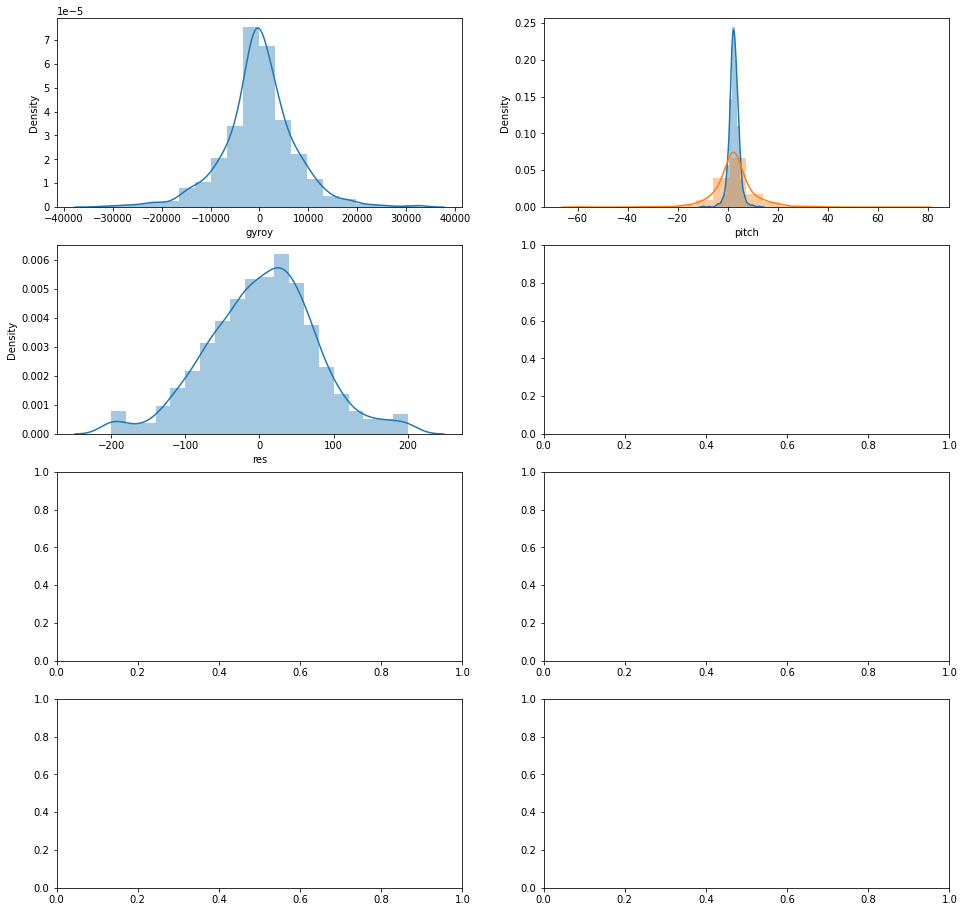

In [4]:
fig, ax = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(df.gyroy, bins = 20, ax = ax[0,0])
sns.distplot(df.kalangley, bins = 20, ax = ax[0,1])
sns.distplot(df.pitch, bins = 20, ax = ax[0,1])
sns.distplot(df.res, bins = 20, ax = ax[1,0])
# sns.distplot(df.insulina, bins = 20, ax = ax[1,1])
# sns.distplot(df.massa, bins = 20, ax = ax[2,0])
# sns.distplot(df.funcao_pedigree, bins = 20, ax = ax[2,1])
# sns.distplot(df.idade, bins = 20, ax = ax[3,0])
# sns.distplot(df.resultado, bins = 20, ax = ax[3,1])

In [5]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/influx/all")
if r.status_code == 200:
    #print(r.content)
    register_influx = json.loads(r.content)
    df_influx = pd.read_json(json.dumps(register_influx))

In [6]:
df_influx.T

0
0     {'time': '2021-10-02T02:04:26.803571Z', 'value...
1     {'time': '2021-10-02T02:04:26.823997Z', 'value...
2     {'time': '2021-10-02T02:04:26.839330Z', 'value...
3     {'time': '2021-10-02T02:04:26.857044Z', 'value...
4     {'time': '2021-10-02T02:04:26.874599Z', 'value...
...                                                 ...
1889  {'time': '2021-10-02T02:05:01.150023Z', 'value...
1890  {'time': '2021-10-02T02:05:01.166897Z', 'value...
1891  {'time': '2021-10-02T02:05:01.185874Z', 'value...
1892  {'time': '2021-10-02T02:05:01.203583Z', 'value...
1893  {'time': '2021-10-02T02:05:01.221618Z', 'value...

[1894 rows x 1 columns]

In [7]:
time = []
value = []
for x in df_influx.T[0]:
    time.append(x["time"])
    value.append(x["value"])

In [8]:
json_serialized_measure = {}
for z in range(len(df_influx.T[0])):
    json_serialized_measure[z] = json.loads(value[z])
    json_serialized_measure[z]["measure"]["time"] = time[z]
    minute = str(time[z]).split(":")[1]
    second = str(time[z]).split(":")[2].split(".")[0]
    marker = str(time[z]).split(":")[2].split(".")[1]
    hour = minute + ":" + second + ":" + marker[:2]
    json_serialized_measure[z]["measure"]["time_formated"] = hour

In [9]:
final_list = {}
for y in range(len(df_influx.T[0])):
    final_list[y] = json_serialized_measure[y]["measure"]

In [10]:
df_item = pd.DataFrame.from_dict(final_list)

In [11]:
df_item.T

accx    accy     accz  gyrox   gyroy   gyroz kalanglex kalangley  \
0     1628.0  -176.0 -17884.0 -327.0   137.0  -224.0     -0.33      3.51   
1     -164.0   380.0 -18952.0 -287.0  -534.0  -917.0     -0.26      3.28   
2     2016.0   -84.0 -18560.0  389.0 -3555.0 -5501.0     -0.17      2.96   
3      544.0  -148.0 -17108.0  531.0 -3469.0 -6792.0     -0.07      2.47   
4     1664.0  -932.0 -17808.0  343.0 -4376.0 -6725.0     -0.11      2.04   
...      ...     ...      ...    ...     ...     ...       ...       ...   
1889  -128.0 -1976.0 -16608.0 -740.0  5307.0  6708.0      0.63      4.08   
1890   332.0  -752.0 -17720.0 -917.0  3814.0  4336.0      0.43      4.47   
1891  -140.0  -448.0 -17308.0 -306.0  1617.0     7.0      0.37      4.48   
1892  1460.0 -1020.0 -18192.0 -292.0   346.0 -1891.0      0.23      4.55   
1893  -704.0   388.0 -18020.0    5.0   344.0 -1820.0      0.33       4.3   

     pitch  roll    res    kp   kd   ki                         time  \
0      5.2 -0.56 -65.72  22.0  1.0  5.0  2021-10-02T02:04:26.803571Z   
1     -0.5  1.15 -64.91  22.0  1.0  5.0  2021-10-02T02:04:26.823997Z   
2      6.2 -0.26 -60.28  22.0  1.0  5.0  2021-10-02T02:04:26.839330Z   
3     1.82  -0.5 -49.52  22.0  1.0  5.0  2021-10-02T02:04:26.857044Z   
4     5.33 -2.98  -37.7  22.0  1.0  5.0  2021-10-02T02:04:26.874599Z   
...    ...   ...    ...   ...  ...  ...                          ...   
1889 -0.44 -6.78 -26.97  22.0  1.0  5.0  2021-10-02T02:05:01.150023Z   
1890  1.07 -2.43 -45.62  22.0  1.0  5.0  2021-10-02T02:05:01.166897Z   
1891 -0.46 -1.48 -56.09  22.0  1.0  5.0  2021-10-02T02:05:01.185874Z   
1892  4.58  -3.2 -67.68  22.0  1.0  5.0  2021-10-02T02:05:01.203583Z   
1893 -2.24  1.23  -71.6  22.0  1.0  5.0  2021-10-02T02:05:01.221618Z   

     time_formated  
0         04:26:80  
1         04:26:82  
2         04:26:83  
3         04:26:85  
4         04:26:87  
...            ...  
1889      05:01:15  
1890      05:01:16  
1891      05:01:18  
1892      05:01:20  
1893      05:01:22  

[1894 rows x 16 columns]

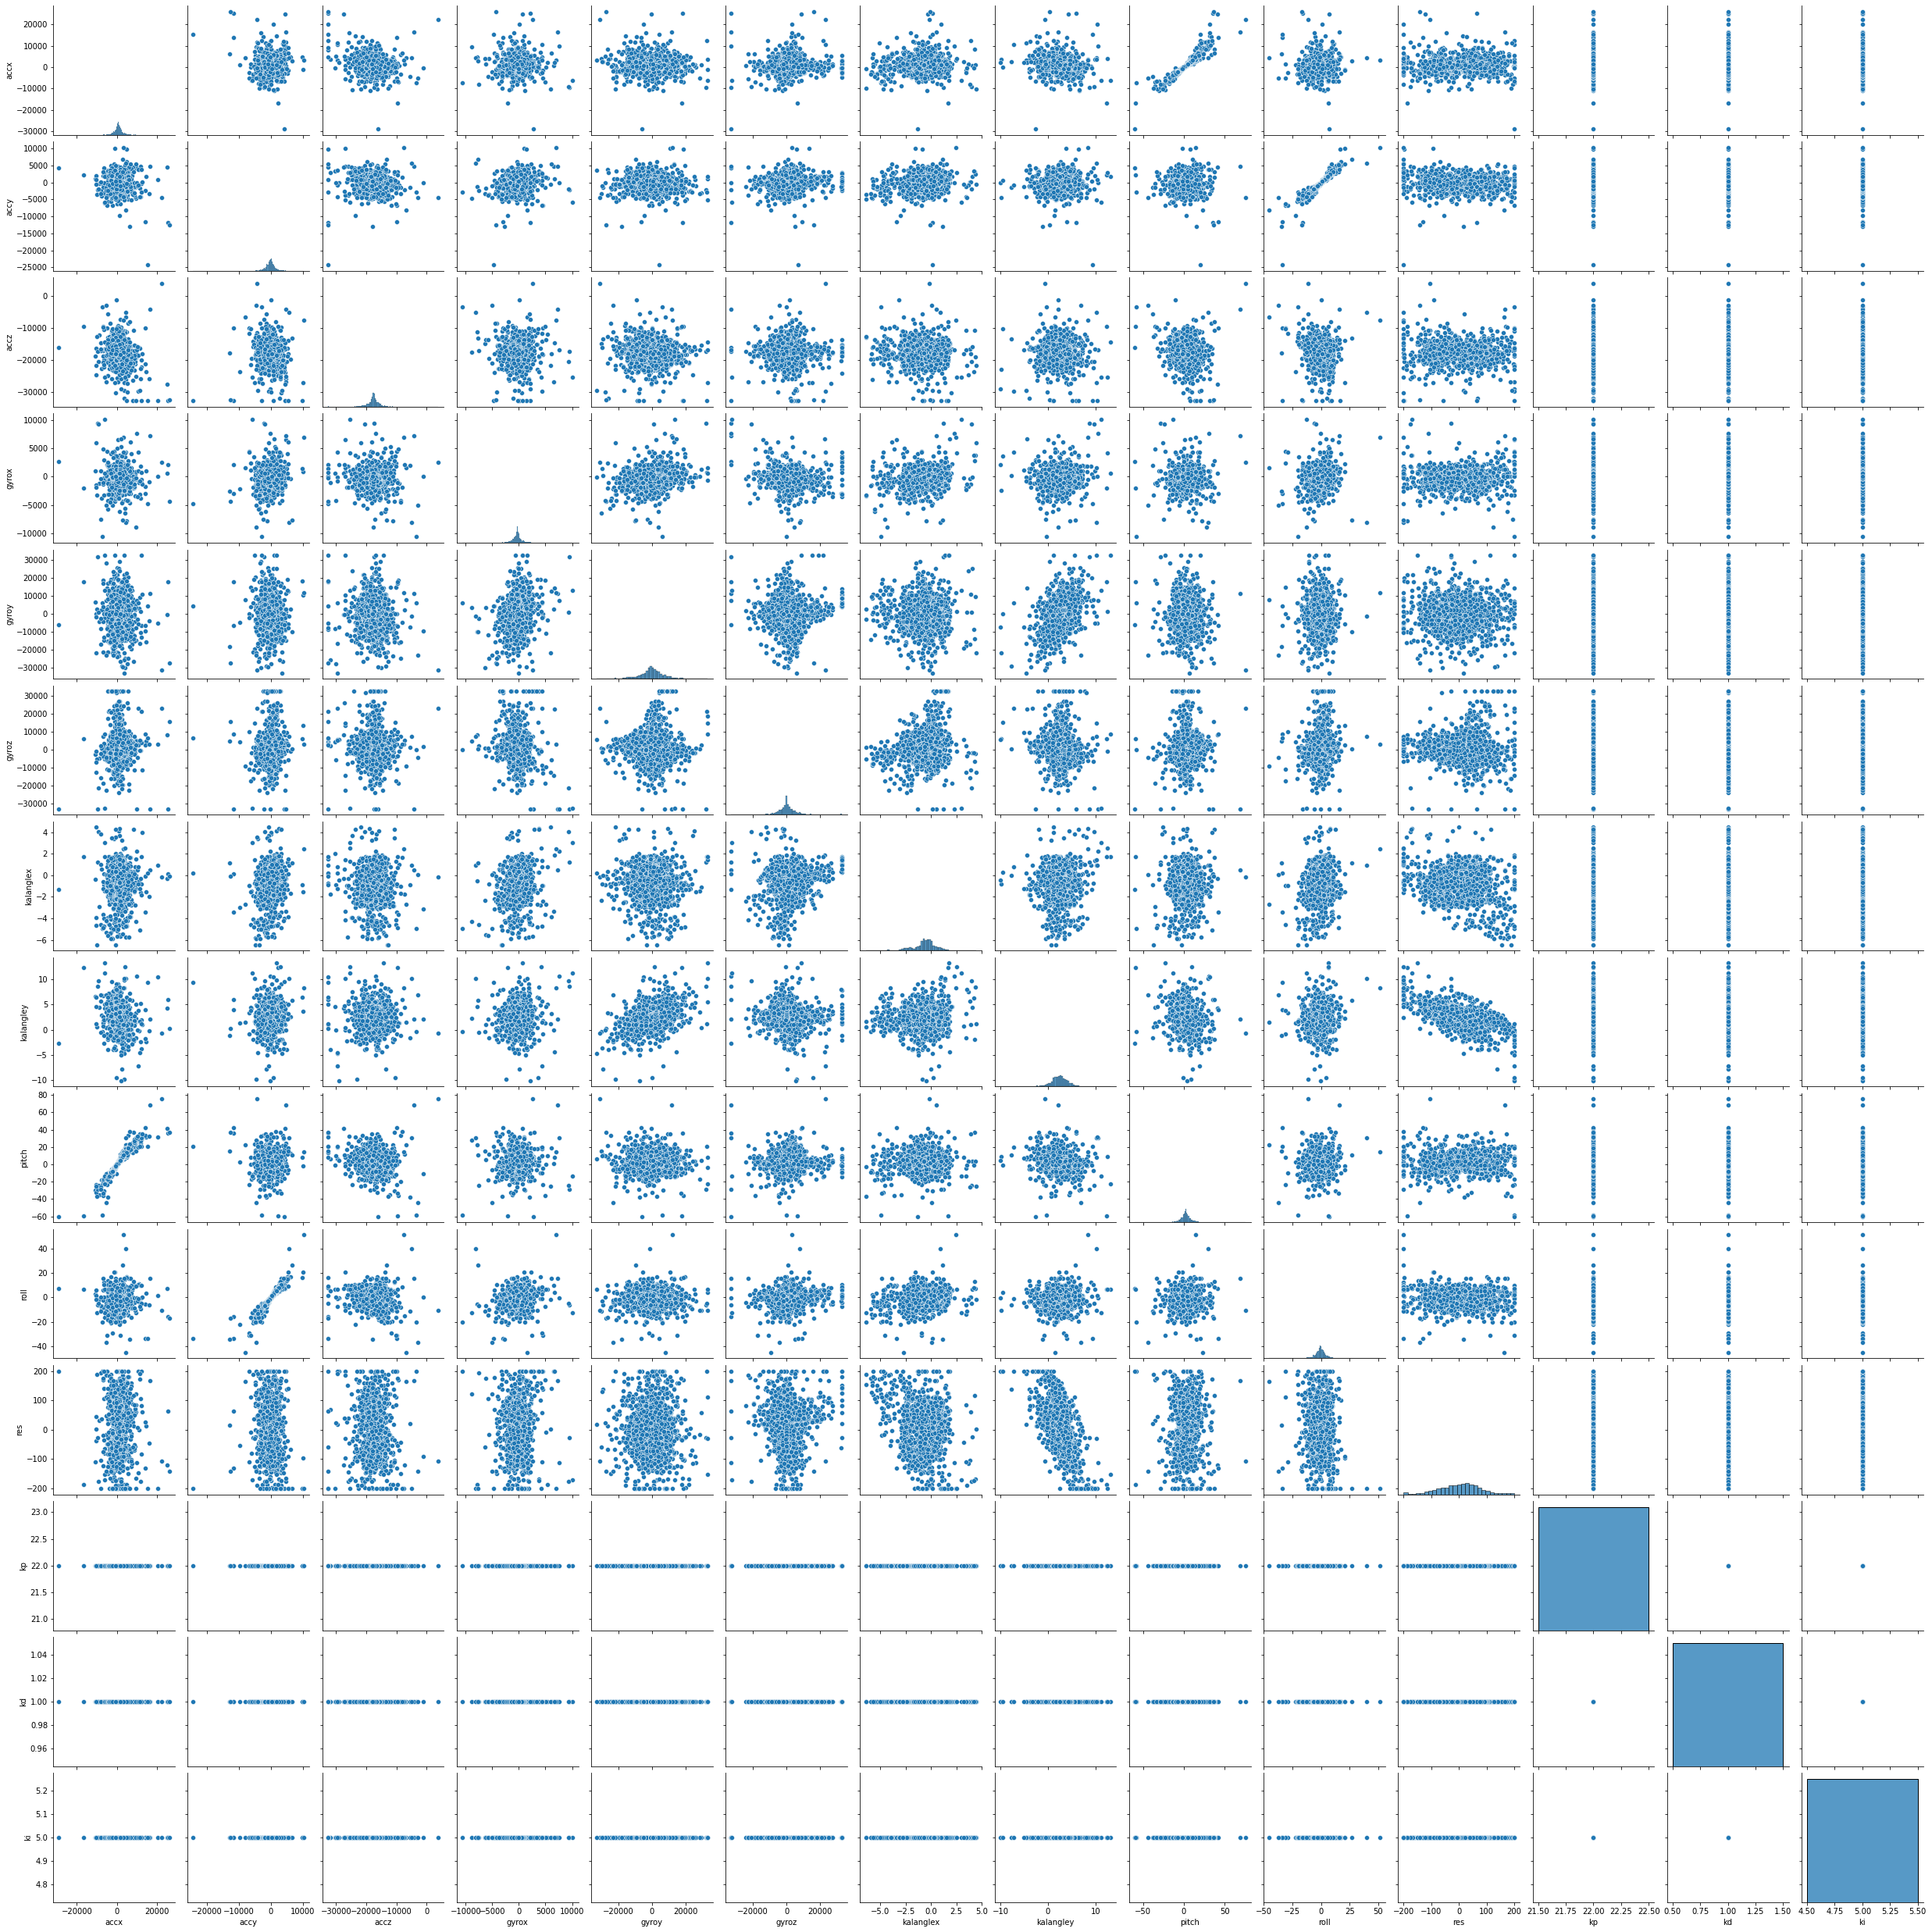

In [12]:
sns.pairplot(data = df_item.T)
plt.show()

/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='roll', ylabel='Density'>

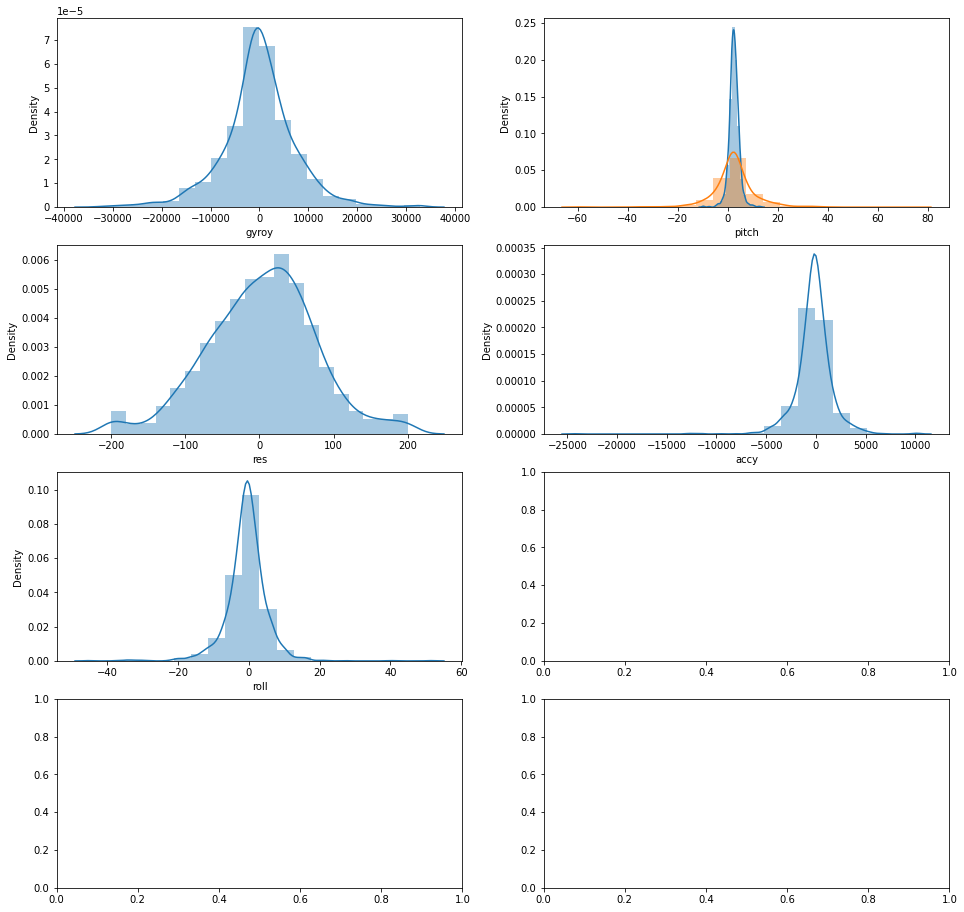

In [13]:
fig, ax = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(df.gyroy, bins = 20, ax = ax[0,0])
sns.distplot(df.kalangley, bins = 20, ax = ax[0,1])
sns.distplot(df.pitch, bins = 20, ax = ax[0,1])
sns.distplot(df.res, bins = 20, ax = ax[1,0])
sns.distplot(df_item.T.accy, bins = 20, ax = ax[1,1])
sns.distplot(df_item.T.roll, bins = 20, ax = ax[2,0])

In [14]:
X = list(df_item.T["time_formated"])
Y = list(df_item.T["res"])

plt.figure(figsize=(500,40))
plt.plot(X, Y, c='b', marker='o')
plt.gcf().autofmt_xdate()
plt.show()